<a href="https://colab.research.google.com/github/jullyoemmanuel/Advanced-ML/blob/main/1_5_Classification_Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Decision Tree

* A tree-like structure in which the internal node represents
the test on an attribute
* Each branch represents the outcome of the test, and each
leaf node represents the class label
* A path from root to leaf represents classification rules

##1.1 Decision Tree Formation

###1.1.1 Entropy

* Entropy measures the impurity of a
collection of examples.
* It depends on the distribution of the
random variable.
* Entropy, in general, measures the
amount of information in a random
variable:

$$H(X) = –∑_{i=1}p_i log_2 pi=∑_{i=1} p_i
log_2 \frac{1}{p_i}$$
$X = \{i, …, c\}$
for classification in c classes.


###1.1.2 Information Gain

* Information gain is the expected reduction
in entropy caused by partitioning the
examples on an attribute.
* Higher the information gain, the more
effective the attribute in classifying
training data.
* Expected reduction in entropy, given $A$
$$Gain(S, A) = Entropy(S) − ∑\frac{|Sv|}{|S|}Entropy(Sv)$$
$$Values(A) = possible values for A$$

#2. Random Forest

##2.1 Bagging and Bootstrapping

* Bagging: A technique for reducing the
variance of an estimated
prediction function
* Bootstrapping: Randomly draws datasets with
replacement from the
training data

##2.2 Problem 1)

**Problem Statement:** PeerLoanKart is an NBFC (Non-banking Financial Company) that facilitates peer-to-peer loan.
It connects people who need money (borrowers) with people who have money (investors). As an investor, you would
want to invest in people who showed a profile of having a high probability of paying you back.
You “as an ML expert” create a model that will help predict whether a borrower will pay the loan or not.

**Objective:** Increase profits up to 20% as NPA will be reduced due to loan disbursal for only creditworthy borrowers

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split

In [3]:
loans = pd.read_csv('loan_borowwer_data.csv')
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


Text(0.5, 0, 'FICO')

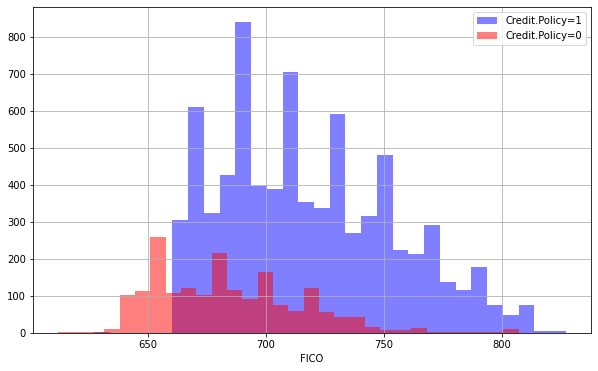

In [4]:
plt.figure(figsize=(10,6))
loans[loans['credit.policy']==1]['fico'].hist(alpha=0.5,color='blue',
bins=30,label='Credit.Policy=1')
loans[loans['credit.policy']==0]['fico'].hist(alpha=0.5,color='red',
bins=30,label='Credit.Policy=0')
plt.legend()
plt.xlabel('FICO')

Text(0.5, 0, 'FICO')

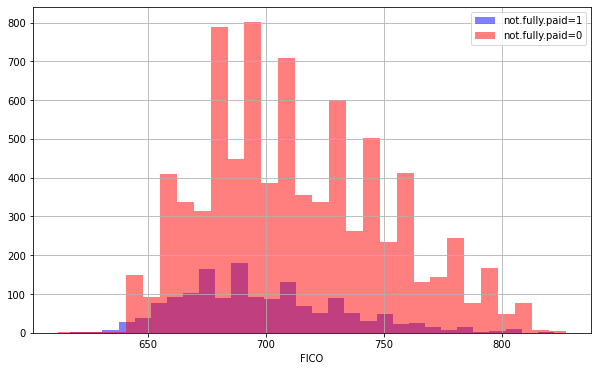

In [5]:
plt.figure(figsize=(10,6))
loans[loans['not.fully.paid']==1]['fico'].hist(alpha=0.5,color='blue',
bins=30,label='not.fully.paid=1')
loans[loans['not.fully.paid']==0]['fico'].hist(alpha=0.5,color='red',
bins=30,label='not.fully.paid=0')
plt.legend()
plt.xlabel('FICO')

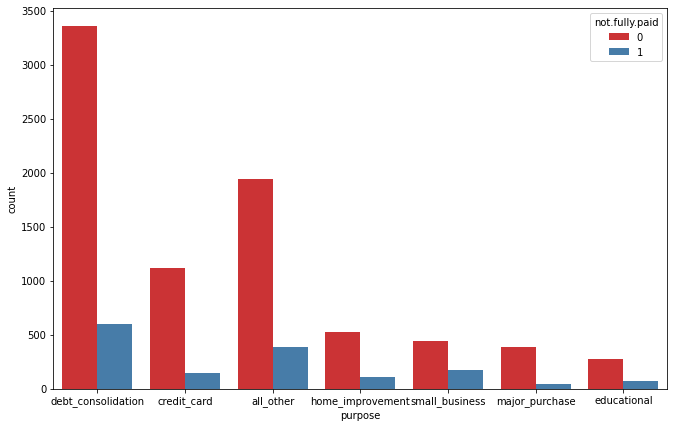

In [6]:
plt.figure(figsize=(11,7))
sns.countplot(x='purpose',hue='not.fully.paid',data=loans,palette='Set1')

In [8]:
cat_feats = ['purpose']

In [9]:
final_data = pd.get_dummies(loans,columns=cat_feats,drop_first=True)
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

In [10]:
X = final_data.drop('not.fully.paid',axis=1)
y = final_data['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,
random_state=101)

In [11]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [12]:
predictions = dtree.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84      2431
           1       0.19      0.23      0.21       443

    accuracy                           0.73      2874
   macro avg       0.52      0.53      0.52      2874
weighted avg       0.75      0.73      0.74      2874



In [13]:
print(confusion_matrix(y_test,predictions))

[[1998  433]
 [ 341  102]]


In [14]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=600)
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=600)

In [15]:
predictions = rfc.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.44      0.02      0.03       443

    accuracy                           0.85      2874
   macro avg       0.65      0.51      0.48      2874
weighted avg       0.79      0.85      0.78      2874



In [16]:
print(confusion_matrix(y_test,predictions))

[[2421   10]
 [ 435    8]]


#3. Naive Baye's Classifier

$$P(A|B) = \frac{P(B|A)P(A)}{P(B)}$$
Where,
* P(A) – Class Prior Probability
* P(B|A) – Likelihood
* P(A|B) – Posterior Probability
* P(A) - Predictor Prior Probability

Note: Naive Baye’s classifier assumes that the presence of a particular feature in a class is unrelated to the
presence of any other feature

#4. Support Vector Machines

Consider a binary separation which can be viewed as the task of separating classes
in feature space

##4.1 Concept of Classification Margin


* Margin distance is the distance bet:
$$\frac{w^τx_i+b}{|w|}$$
* Closest to the hyperplane are support vectors.
* Margin ρ of the separator is the distance between
support vectors.

## Problem 2)

In [31]:
#Import the Dataset
df = pd.read_csv("College.csv")
df = df.drop(columns = ['Unnamed: 0'])
df.columns

Index(['Private', 'Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc',
       'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Books',
       'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend',
       'Grad.Rate'],
      dtype='object')

In [32]:
#First five rows and columns
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [33]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder

X, y = df.iloc[:, 1:].values, df.iloc[:, 0].values
# male -> 1
# female -> 0
target_encoder = LabelEncoder()
y = target_encoder.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=1)
print(X_train.shape)

(621, 17)


In [34]:
#Fit the Linear SVC Classifier
from sklearn.svm import LinearSVC, SVC

classifier = LinearSVC()
classifier.fit(X_train,y_train)
y_predict = classifier.predict(X_test)
classifier.score(X_test,y_test)

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.9230769230769231

In [35]:
#Obtain Performance Matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_predict,y_test))

[[ 36   9]
 [  3 108]]


In [36]:
#Fit the SVC Classifier
classifier = SVC()
classifier.fit(X_train,y_train)
classifier.score(X_test,y_test)

0.9230769230769231

In [37]:
#Preprocess the Data
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X, y = df.iloc[:, 1:].values, df.iloc[:, 0].values
X = scaler.fit_transform(X)
target_encoder = LabelEncoder()
y = target_encoder.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=1)
print(X_train.shape)

(621, 17)


In [38]:
#Refitting the SVC Model

classifier = SVC()
classifier.fit(X_train,y_train)
classifier.score(X_test,y_test)

0.9423076923076923

In [42]:
#Fitting Grid Search
from sklearn.model_selection import StratifiedShuffleSplit

C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)
param_grid = dict( gamma=gamma_range,C=C_range)
grid = GridSearchCV(SVC(), param_grid=param_grid)
grid.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05,
       1.e+06, 1.e+07, 1.e+08, 1.e+09, 1.e+10]),
                         'gamma': array([1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02,
       1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])})